In [0]:
#Import packages and libraries
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [0]:
#Load dataset
x, y = sklearn.datasets.make_moons(200, noise=0.15)

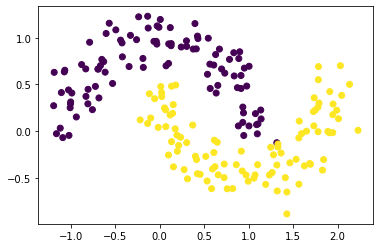

In [113]:
#Let's look our dataset
plt.scatter(x[:,0],x[:,1], c=y)
plt.show()

In [0]:
# Initialization Hyperparameters 
input_neurons = 2
output_neurons = 2
num_samples = x.shape[0]
learning_rate = 0.001
lambda_reg = 0.01

In [0]:
# Define retreive function to retreive and update (weights and bias)
def retreive(model_dict):
    W1 = model_dict['W1']
    b1 = model_dict['b1']
    W2 = model_dict['W2']
    b2 = model_dict['b2']
    return W1, b1, W2, b2

In [0]:
# Define forword function to perform dot product (inputs--->hidden--->output)
def forward(x, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  #perform dot product between first layer
  z1 = x.dot(W1) + b1
  # pass from activation function
  a1 = np.tanh(z1)
  # perfor dot product between second layer
  z2 = a1.dot(W2) + b2
  # pass from activation function
  a2 = np.tanh(z2)
  # Find the probability softmax distribution
  exp_scores = np.exp(a2)
  softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
  return z1, a1, softmax


In [0]:
# Define loss function to calculate loss
m = np.zeros(200)
def loss(softmax, model_dict):
  W1, b1, W2, b2 = retreive(model_dict)
  for i, correct_index in enumerate(y):
    predicted = softmax[i][correct_index]
    m[i] = predicted
  # Calculate Cross entropy loss
  loss_prob = -np.log(m)
  # Calculate softmax loss
  loss = np.sum(loss_prob)
  # Calculate L2 regularization and add in loss
  l2 = reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) 
  loss+=l2
  return loss / y.shape[0]  # loss is calculated for all the sample to normalize it divide by number of samples


In [0]:
# Define predict function for testing
# def predict(x, model_dict):
#   W1, b1, W2, b2 = retreive(model_dict)
#   #perform dot product between first layer
#   z1 = x.dot(W1) + b1
#   # pass from activation function
#   a1 = np.tanh(z1)
#   # perfor dot product between second layer
#   z2 = a1.dot(W2) + b2
#   # pass from activation function
#   a2 = np.tanh(z2)
#   # Find the probability softmax distribution
#   exp_scores = np.exp(a2)
#   softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)
#   return np.argmax(softmax, axis=1)
def predict(model_dict, x):
    W1, b1, W2, b2 = retreive(model_dict)
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    softmax = exp_scores / np.sum(exp_scores, axis = 1, keepdims = True)   # (200,2)
    return np.argmax(softmax, axis = 1)    # (200,)

### Equations for Backprop

![backprop](https://user-images.githubusercontent.com/30661597/67566804-3e405980-f75b-11e9-9e19-f3c388745c0a.png)

## $\frac{\partial L}{\partial y_{1}}=-\tilde{y}_{1}\left[\frac{\left(y_{1}\right)^{\prime}}{y_{1}}\right]=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]$

![der](https://user-images.githubusercontent.com/46392773/56460220-ec94cc00-63d1-11e9-91d1-b4e3c57c81fd.png)


## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{1}{y_{1}}\right]\frac{\partial y_{1}}{\partial z_{1}}=-\tilde{y}_{1}\left[\frac{y_{1}\left(1-y_{1}\right)}{y_{1}}\right]=-\tilde{y}_{1}\left(1-y_{1}\right)$

Recall that our labels are in the form of a one-hot vector: (ex. If class 1 is correct, then the corresponding label is [1,0], if class 2 is correct, then the corresponding label is [0,1]).

If class one is the actual prediction: $\tilde{y}_{1} = 1 $, then we have:

## $\frac{\partial L}{\partial y_{1}} \frac{\partial y_{1}}{\partial z_{1}} = -1(1-y_{1}) = y_{1} - 1 = \delta_{3}$

## $\delta_{2}=\left(1-\tanh ^{2} z_{1}\right) \circ \delta_{3} W_{2}^{T}$

## $\frac{\partial L}{\partial W_{2}}=a_{1}^{T} \delta_{3}$

## $\frac{\partial L}{\partial b_{2}}=\delta_{3}$

## $\frac{\partial L}{\partial W_{1}}=x^{T} \delta 2$

## $\frac{\partial L}{\partial b_{1}}=\delta 2$

In [0]:
def backpropagation(x, y, model_dict, epochs):
    for i in range(epochs):
        W1, b1, W2, b2 = retreive(model_dict)
        z1, a1, probs = forward(x, model_dict)    # a1: (200,3), probs: (200,2)
        delta3 = np.copy(probs)
        delta3[range(x.shape[0]), y] -= 1      # (200,2)
        dW2 = (a1.T).dot(delta3)               # (3,2)
        db2 = np.sum(delta3, axis=0, keepdims=True)        # (1,2)
        delta2 = delta3.dot(W2.T) * (1 - np.power(np.tanh(z1), 2))
        dW1 = np.dot(x.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms
        dW2 += lambda_reg * np.sum(W2)  
        dW1 += lambda_reg * np.sum(W1)  
        # Update Weights: W = W + (-lr*gradient) = W - lr*gradient
        W1 += -learning_rate * dW1
        b1 += -learning_rate * db1
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2
        # Update the model dictionary
        model_dict = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        # Print the loss every 50 epochs
        if i%50 == 0:
            print("Loss at epoch {} is: {:.3f}".format(i,loss(probs, model_dict)))
            
    return model_dict

In [0]:
# Define initial weights
def initialize(input_dim, hidden_dim, output_dim):
  model = {}
  #Initialize weight using xavier initialization
  W1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)
  b1 =np.zeros((1,hidden_dim))
  W2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim)
  b2 = np.zeros((1, output_dim))
  model['W1'] = W1
  model['b1'] = b1
  model['W2'] = W2
  model['b2'] = b2
  return model


In [0]:
def plot_decision_boundary(pred_func): 
    """
    Code adopted from: https://github.com/dennybritz/nn-from-scratch
    """
    # Set min and max values and give it some padding 
    x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5 
    y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Spectral) 
    plt.title("Decision Boundary for hidden layer size 3")

Loss at epoch 0 is: 0.637
Loss at epoch 50 is: 0.402
Loss at epoch 100 is: 0.369
Loss at epoch 150 is: 0.366
Loss at epoch 200 is: 0.368
Loss at epoch 250 is: 0.368
Loss at epoch 300 is: 0.368
Loss at epoch 350 is: 0.366
Loss at epoch 400 is: 0.365
Loss at epoch 450 is: 0.366
Loss at epoch 500 is: 0.367
Loss at epoch 550 is: 0.368
Loss at epoch 600 is: 0.367
Loss at epoch 650 is: 0.367
Loss at epoch 700 is: 0.366
Loss at epoch 750 is: 0.366
Loss at epoch 800 is: 0.367
Loss at epoch 850 is: 0.368
Loss at epoch 900 is: 0.370
Loss at epoch 950 is: 0.371
Loss at epoch 1000 is: 0.373
Loss at epoch 1050 is: 0.374
Loss at epoch 1100 is: 0.376
Loss at epoch 1150 is: 0.378
Loss at epoch 1200 is: 0.379
Loss at epoch 1250 is: 0.381
Loss at epoch 1300 is: 0.383
Loss at epoch 1350 is: 0.385
Loss at epoch 1400 is: 0.387
Loss at epoch 1450 is: 0.388


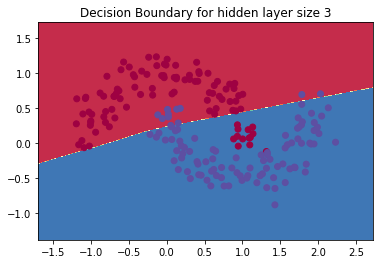

In [122]:
# Let's train out model
model_dict = initialize(input_dim=input_neurons, hidden_dim=3,output_dim=output_neurons)
model = backpropagation(x , y, model_dict=model_dict, epochs=1500)
plot_decision_boundary(lambda x: predict(model, x))